<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 4 / SPRINT 2 / Assignment 3*

--- 

# Language Modeling with RNN



## Code

다음 링크는 LSTM을 사용하여 Spam 메시지 분류를 수행한 캐글 노트북입니다. => [Link](https://www.kaggle.com/kredy10/simple-lstm-for-text-classification) <br/>

위 노트북에서 사용한 코드를 참고하여<br/>
캐글 데이터셋인 [Women's E-Commerce Clothing Reviews](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews) 를 분류해 보세요.

- 분류에 사용될 텍스트 데이터 : **`Review Text`** 열을 사용합니다.
- 레이블(label) 데이터 : **`Recommended IND`** 열을 사용합니다.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
from google.colab import files

file = files.upload()

Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews.csv


### 1) 데이터 전처리
    
- 데이터셋을 데이터프레임으로 읽어옵니다.
- 필요없는 열(column)을 삭제합니다.

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df = df[['Review Text', 'Recommended IND']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review Text      22641 non-null  object
 1   Recommended IND  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [ ]:
df.columns = ['reviews', 'recommended']
df.head()

,reviews,recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Recommended IND Reviews')

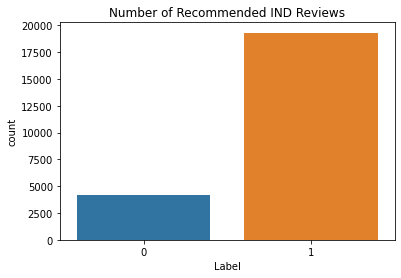

In [ ]:
sns.countplot(df.recommended)
plt.xlabel('Label')
plt.title('Number of Recommended IND Reviews')

In [ ]:
X = df.reviews.astype('str')
Y = df.recommended

### 2) 텍스트 분류를 수행해주세요.

- 데이터셋 split시 test_size의 비율은 20%로, `random_state = 42` 로 설정합니다. 
- Tokenizer의 `num_words=3000` 으로 설정합니다.
- pad_sequence의 `maxlen=400` 으로 설정합니다.
- 학습 시, 파라미터는 `batch_size=128, epochs=10, validation_split=0.2` 로 설정합니다.
- EarlyStopping을 적용합니다. 파라미터는 `monitor='val_loss',min_delta=0.0001, patience=3` 로 설정합니다.
- evaluate 했을 때의 loss와 accuarcy를 [loss, acc] 형태로 입력해주세요. Ex) [0.4321, 0.8765]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
print(f'Mean length of train set: {np.mean([len(sent) for sent in X_train], dtype=int)}')

Mean length of train set: 297


In [ ]:
max_words = 3000
max_len = 400
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 400)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 400, 50)           150000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [ ]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001, patience=3)])

Epoch 1/10
118/118 [==============================] - 73s 472ms/step - loss: 0.4409 - accuracy: 0.8248 - val_loss: 0.2776 - val_accuracy: 0.8856
Epoch 2/10
118/118 [==============================] - 55s 465ms/step - loss: 0.2454 - accuracy: 0.8991 - val_loss: 0.2836 - val_accuracy: 0.8920
Epoch 3/10
118/118 [==============================] - 55s 466ms/step - loss: 0.2177 - accuracy: 0.9099 - val_loss: 0.3227 - val_accuracy: 0.8874
Epoch 4/10
118/118 [==============================] - 54s 461ms/step - loss: 0.1982 - accuracy: 0.9205 - val_loss: 0.2615 - val_accuracy: 0.8920
Epoch 5/10
118/118 [==============================] - 55s 466ms/step - loss: 0.1947 - accuracy: 0.9232 - val_loss: 0.2561 - val_accuracy: 0.8957
Epoch 6/10
118/118 [==============================] - 55s 465ms/step - loss: 0.1851 - accuracy: 0.9246 - val_loss: 0.4256 - val_accuracy: 0.8292
Epoch 7/10
118/118 [==============================] - 56s 472ms/step - loss: 0.1769 - accuracy: 0.9290 - val_loss: 0.2966 - val_ac

In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)

147/147 [==============================] - 7s 48ms/step - loss: 0.3483 - accuracy: 0.8548


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.348
  Accuracy: 0.855
